## Imported necessary libraries and loaded data using pandas in a dataframe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(r'C:\Users\LENOVO\Desktop\netflix_customer_churn.csv')
df

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,44f3ba44-b95d-4e50-a786-bac4d06f4a43,19,Female,Basic,49.17,11,Europe,Desktop,8.99,0,Credit Card,4,4.10,Drama
4996,18779bcb-ba2b-41da-b751-e70b812061ec,67,Female,Basic,9.24,2,North America,Desktop,8.99,0,PayPal,3,3.08,Documentary
4997,3f32e8c5-615b-4a3b-a864-db2688f7834f,66,Male,Standard,16.55,49,South America,Desktop,13.99,1,Debit Card,2,0.33,Action
4998,7b0ad82d-6571-430e-90f4-906259e0e89c,59,Female,Basic,9.12,3,Europe,Laptop,8.99,0,Credit Card,4,2.28,Sci-Fi


## Dropped a column that is not in use and created new one

In [2]:
df.drop(columns=['avg_watch_time_per_day'], inplace = True)
df['watch_hours_per_profile'] = df['watch_hours'] / df['number_of_profiles']

## Get data information for better understanding about columns, datatypes and nulls in a column

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              5000 non-null   object 
 1   age                      5000 non-null   int64  
 2   gender                   5000 non-null   object 
 3   subscription_type        5000 non-null   object 
 4   watch_hours              5000 non-null   float64
 5   last_login_days          5000 non-null   int64  
 6   region                   5000 non-null   object 
 7   device                   5000 non-null   object 
 8   monthly_fee              5000 non-null   float64
 9   churned                  5000 non-null   int64  
 10  payment_method           5000 non-null   object 
 11  number_of_profiles       5000 non-null   int64  
 12  favorite_genre           5000 non-null   object 
 13  watch_hours_per_profile  5000 non-null   float64
dtypes: float64(3), int64(4),

## Get stats about numerical columns to understand data well

In [4]:
df.describe()

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,watch_hours_per_profile
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.847400,11.649450,30.089800,13.683400,0.503000,3.024400,5.218194
std,15.501128,12.014654,17.536078,3.692062,0.500041,1.415841,6.907817
min,18.000000,0.010000,0.000000,8.990000,0.000000,1.000000,0.002000
25%,30.000000,3.337500,15.000000,8.990000,0.000000,2.000000,1.126500
50%,44.000000,8.000000,30.000000,13.990000,1.000000,3.000000,2.960000
75%,58.000000,16.030000,45.000000,17.990000,1.000000,4.000000,6.583000
max,70.000000,110.400000,60.000000,17.990000,1.000000,5.000000,81.070000


## Drop duplicate entries to reduce redundancies

In [5]:
df.drop_duplicates(inplace = True)

## Applied lambda function to trim extra spaces from non-numeric or object type columns

In [6]:
df = df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
df

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,favorite_genre,watch_hours_per_profile
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,Action,14.7300
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,Sci-Fi,0.1400
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,Drama,8.1600
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,Horror,2.2550
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,Action,0.9450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,44f3ba44-b95d-4e50-a786-bac4d06f4a43,19,Female,Basic,49.17,11,Europe,Desktop,8.99,0,Credit Card,4,Drama,12.2925
4996,18779bcb-ba2b-41da-b751-e70b812061ec,67,Female,Basic,9.24,2,North America,Desktop,8.99,0,PayPal,3,Documentary,3.0800
4997,3f32e8c5-615b-4a3b-a864-db2688f7834f,66,Male,Standard,16.55,49,South America,Desktop,13.99,1,Debit Card,2,Action,8.2750
4998,7b0ad82d-6571-430e-90f4-906259e0e89c,59,Female,Basic,9.12,3,Europe,Laptop,8.99,0,Credit Card,4,Sci-Fi,2.2800


## Get unique entries count for each column

In [7]:
df.nunique()

customer_id                5000
age                          53
gender                        3
subscription_type             3
watch_hours                2343
last_login_days              61
region                        6
device                        5
monthly_fee                   3
churned                       2
payment_method                5
number_of_profiles            5
favorite_genre                7
watch_hours_per_profile    3449
dtype: int64

## Get unique data for columns to understand data well and to know if any incorrect formattings exists

In [8]:
df['subscription_type'].unique()

array(['Basic', 'Standard', 'Premium'], dtype=object)

In [9]:
df['region'].unique()

array(['Africa', 'Europe', 'Asia', 'Oceania', 'South America',
       'North America'], dtype=object)

In [10]:
df['device'].unique()

array(['TV', 'Mobile', 'Laptop', 'Desktop', 'Tablet'], dtype=object)

In [11]:
df['payment_method'].unique()

array(['Gift Card', 'Crypto', 'Debit Card', 'PayPal', 'Credit Card'],
      dtype=object)

In [12]:
df['favorite_genre'].unique()

array(['Action', 'Sci-Fi', 'Drama', 'Horror', 'Romance', 'Comedy',
       'Documentary'], dtype=object)

## Made visualizations like histograms and countplots to understand customer behaviour and relationships to churn

(100.0, 400.0)

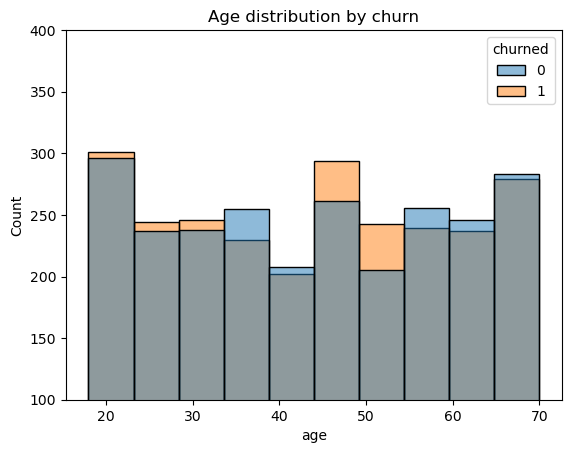

In [13]:
sns.histplot(x = 'age',hue = 'churned', data = df, bins = 10)
plt.title("Age distribution by churn")
plt.ylim(100,400)

(0.0, 200.0)

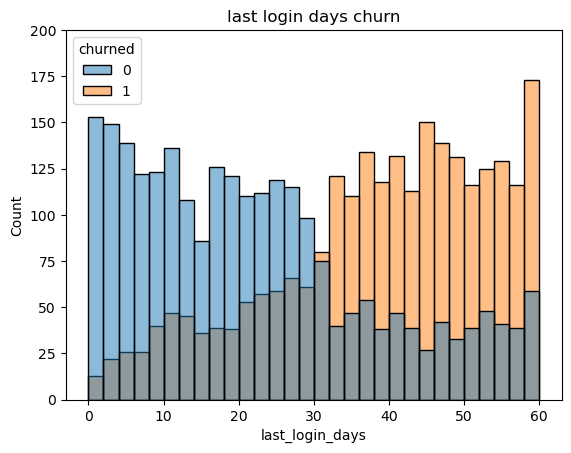

In [14]:
sns.histplot(x = 'last_login_days',hue = 'churned', data = df, bins = 30)
plt.title("last login days churn")
plt.ylim(0,200)

(700.0, 900.0)

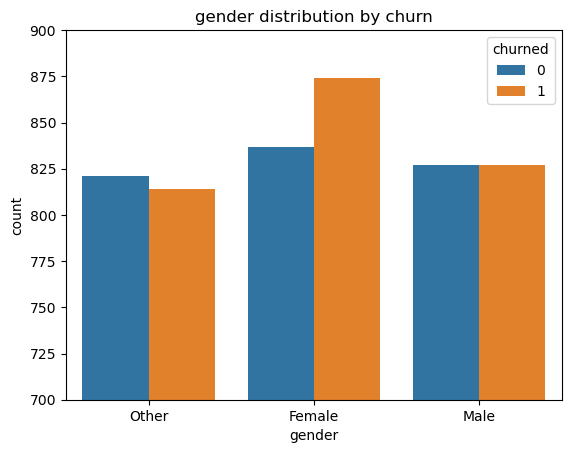

In [15]:
sns.countplot(x = 'gender',hue = 'churned', data = df)
plt.title("gender distribution by churn")
plt.ylim(700,900)

(0.0, 600.0)

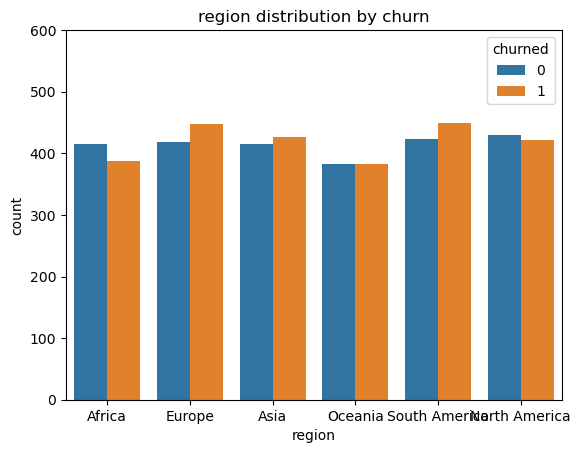

In [16]:
sns.countplot(x = 'region',hue = 'churned', data = df)
plt.title("region distribution by churn")
plt.ylim(0,600)

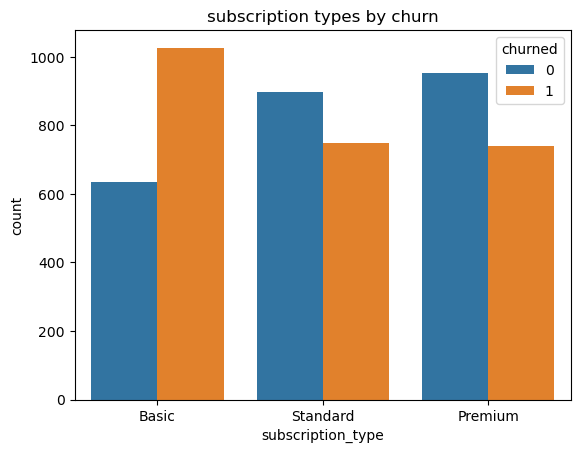

In [17]:
sns.countplot(x='subscription_type', hue='churned',data=df)
plt.title('subscription types by churn')
plt.show()

(900.0, 1100.0)

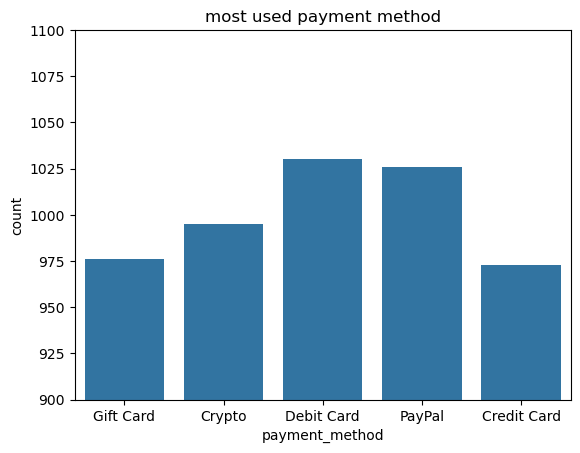

In [18]:
sns.countplot(x = 'payment_method', data = df)
plt.title('most used payment method')
plt.ylim(900,1100)

(600.0, 800.0)

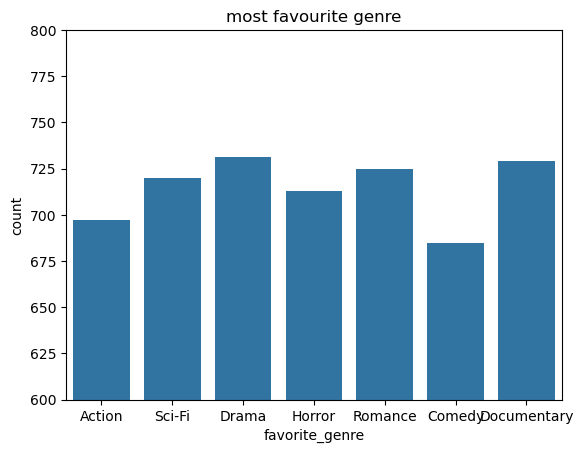

In [19]:
sns.countplot(x = 'favorite_genre', data = df)
plt.title('most favourite genre')
plt.ylim(600,800)

## For reference, Check if count plot gives accurate values or not

In [20]:
df['favorite_genre'].value_counts()['Sci-Fi']

720